In [227]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import math
import scipy
import sklearn

In [238]:
contents = open("data/(1) The Hunger Games.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(2) Catching Fire.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(3.1) Mockingjay.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(3.2) Mockingjay.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/Lords of the Rings.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/Pride and Prejudice.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/Frankenstein.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/The History of Don Quixote.txt", "r", encoding='utf-8').read()

In [229]:
sentences = contents.lower().replace("\r\n", " ").replace("\r", " ").replace("\n", " ").replace(';', ' ').replace(',', ' ').replace('?', ' ').replace('"', ' ').replace("“", ' ').replace("'", ' ').replace(":", ' ').replace("*", ' ').replace("#", ' ').replace("[", ' ').replace("]", ' ').replace("-", ' ').split(".")

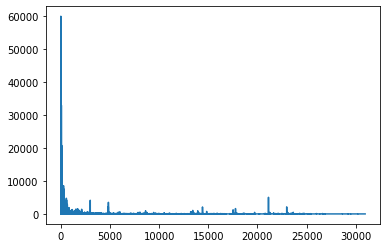

4044


In [230]:
# create dictionary
dictionary = []
tmp_dictionary = {}
#words_vector = new array()
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    for word in words:
        if len(word.strip()) > 0:
            if word not in tmp_dictionary:
                tmp_dictionary[word] = 0
            tmp_dictionary[word] += 1
            
plt.plot(list(tmp_dictionary.values()))
plt.show()
            
# keep only frequent words occurences
mean = np.mean(list(tmp_dictionary.values()))
stdev = np.std(list(tmp_dictionary.values()))

for word in tmp_dictionary:
    if tmp_dictionary[word] > 20 and len(word) > 1 and not word.isnumeric():
        dictionary.append(word)
        
print(len(dictionary))

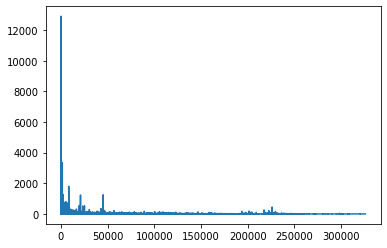

3.0205640062367256 - 39.126598192338946
4632


In [231]:
# get vector dimensions
tmp_vector_dimensions = {}
vector_dimensions = []
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    prev_word = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            next_word = ''
            if i < len(words) - 1: next_word = words[i + 1]
            dimension = prev_word + "_XXX_" + next_word
            if dimension not in tmp_vector_dimensions:
                tmp_vector_dimensions[dimension] = 0
            tmp_vector_dimensions[dimension] += 1
            prev_word = word

            
plt.plot(list(tmp_vector_dimensions.values()))
plt.show()            
            
# keep only frequent dimensions occurences
mean = np.mean(list(tmp_vector_dimensions.values()))
stdev = np.std(list(tmp_vector_dimensions.values()))

print(str(mean) + " - " + str(stdev))

for dimension in tmp_vector_dimensions:
    if tmp_vector_dimensions[dimension] > 20 and tmp_vector_dimensions[dimension] < 2000:
        vector_dimensions.append(dimension)

print(len(vector_dimensions))

In [239]:
for x in vector_dimensions:
    print(x)

hunger_XXX_
the_XXX_games
games_XXX_
_XXX_i
wake_XXX_
the_XXX_side
other_XXX_of
side_XXX_the
the_XXX_is
is_XXX_
_XXX_fingers
but_XXX_only
_XXX_must
she_XXX_have
and_XXX_in
our_XXX_
_XXX_course
she_XXX_
_XXX_is
this_XXX_the
day_XXX_the
_XXX_up
_XXX_enough
light_XXX_the
to_XXX_them
see_XXX_
_XXX_little
my_XXX_sister
little_XXX_
sister_XXX_
up_XXX_her
on_XXX_side
her_XXX_
looks_XXX_
but_XXX_so
_XXX_face
as_XXX_as
the_XXX_which
for_XXX_she
which_XXX_was
was_XXX_
_XXX_mother
my_XXX_was
beautiful_XXX_
once_XXX_
_XXX_so
or_XXX_
they_XXX_me
tell_XXX_
_XXX_at
her_XXX_the
him_XXX_
bright_XXX_
or_XXX_least
least_XXX_
_XXX_though
even_XXX_it
though_XXX_was
years_XXX_
to_XXX_in
him_XXX_a
_XXX_last
the_XXX_thing
last_XXX_i
another_XXX_to
so_XXX_
cried_XXX_
even_XXX_to
to_XXX_him
_XXX_turned
it_XXX_out
out_XXX_
got_XXX_of
and_XXX_a
even_XXX_the
when_XXX_a
_XXX_has
at_XXX_
the_XXX_will
ever_XXX_to
the_XXX_and
and_XXX_into
hunting_XXX_
_XXX_that
to_XXX_feet
_XXX_on
on_XXX_
up_XXX_a
into_XXX_
on_XXX_tab

_XXX_will
will_XXX_him
him_XXX_i
before_XXX_
the_XXX_have
have_XXX_been
_XXX_moment
_XXX_mean
but_XXX_of
escape_XXX_the
left_XXX_
ever_XXX_in
sit_XXX_the
fingers_XXX_the
as_XXX_to
for_XXX_next
next_XXX_
loved_XXX_
cannot_XXX_to
with_XXX_and
red_XXX_
is_XXX_an
will_XXX_more
_XXX_out
she_XXX_my
when_XXX_was
she_XXX_a
for_XXX_minutes
few_XXX_
do_XXX_that
now_XXX_i
will_XXX_be
to_XXX_any
people_XXX_the
will_XXX_her
get_XXX_the
the_XXX_she
she_XXX_be
with_XXX_as
them_XXX_i
_XXX_also
them_XXX_he
he_XXX_i
this_XXX_or
not_XXX_for
for_XXX_they
should_XXX_him
some_XXX_of
her_XXX_of
and_XXX_was
and_XXX_about
we_XXX_be
we_XXX_it
soon_XXX_
she_XXX_out
to_XXX_mother
again_XXX_
it_XXX_time
on_XXX_own
both_XXX_
in_XXX_is
it_XXX_all
to_XXX_herself
herself_XXX_
_XXX_take
then_XXX_it
take_XXX_
take_XXX_of
_XXX_be
my_XXX_in
but_XXX_have
to_XXX_care
must_XXX_that
that_XXX_her
in_XXX_heart
where_XXX_is
to_XXX_before
maybe_XXX_
say_XXX_i
it_XXX_in
to_XXX_down
down_XXX_a
you_XXX_come
will_XXX_
really_XXX_
ask

and_XXX_so
it_XXX_then
the_XXX_over
on_XXX_shoulders
make_XXX_the
before_XXX_the
are_XXX_at
another_XXX_the
already_XXX_the
those_XXX_have
the_XXX_few
the_XXX_its
will_XXX_it
long_XXX_
days_XXX_the
need_XXX_
of_XXX_first
but_XXX_no
_XXX_days
_XXX_got
on_XXX_right
first_XXX_that
let_XXX_know
on_XXX_they
gone_XXX_
for_XXX_rest
that_XXX_may
not_XXX_up
of_XXX_him
to_XXX_through
night_XXX_
see_XXX_i
made_XXX_a
this_XXX_will
long_XXX_it
_XXX_lay
lay_XXX_the
it_XXX_been
_XXX_s
if_XXX_should
should_XXX_to
if_XXX_s
the_XXX_water
that_XXX_they
if_XXX_it
to_XXX_water
walk_XXX_
after_XXX_of
little_XXX_to
in_XXX_life
_XXX_another
coming_XXX_
who_XXX_it
water_XXX_the
and_XXX_two
and_XXX_set
set_XXX_on
tree_XXX_
not_XXX_but
in_XXX_other
it_XXX_some
in_XXX_manner
foot_XXX_the
in_XXX_it
my_XXX_bag
sleeping_XXX_
top_XXX_the
few_XXX_of
which_XXX_to
in_XXX_sky
living_XXX_
they_XXX_only
from_XXX_3
that_XXX_that
of_XXX_forest
will_XXX_my
when_XXX_of
his_XXX_for
we_XXX_come
come_XXX_to
any_XXX_in
when_XXX_is

said_XXX_landlord
strider_XXX_
until_XXX_had
made_XXX_answer
letter_XXX_
all_XXX_who
which_XXX_did
or_XXX_not
him_XXX_her
upon_XXX_to
the_XXX_whom
that_XXX_master
had_XXX_some
thee_XXX_
your_XXX_would
and_XXX_which
good_XXX_in
may_XXX_that
don_XXX_at
young_XXX_of
noble_XXX_
to_XXX_upon
whom_XXX_was
on_XXX_account
of_XXX_book
the_XXX_told
enchanted_XXX_
nor_XXX_he
whom_XXX_had
was_XXX_not
that_XXX_which
he_XXX_said
thus_XXX_
chapter_XXX_the
knew_XXX_what
in_XXX_service
nor_XXX_it
by_XXX_it
to_XXX_purpose
receive_XXX_
that_XXX_shall
valiant_XXX_
all_XXX_heart
all_XXX_more
that_XXX_by
every_XXX_that
of_XXX_mirrors
don_XXX_of
might_XXX_his
of_XXX_lady
and_XXX_lady
lady_XXX_the
hearing_XXX_
the_XXX_lady
may_XXX_you
however_XXX_not
of_XXX_island
the_XXX_gutenberg
terms_XXX_the
of_XXX_project
chapter_XXX_is
_XXX_
_XXX_replied
replied_XXX_he
to_XXX_
i_XXX_not
him_XXX_she
bennet_XXX_
you_XXX_
on_XXX_subject
the_XXX_ladies
darcy_XXX_
the_XXX_
bingley_XXX_
all_XXX_world
most_XXX_and
observed

In [232]:
# create words vector
words_vector = np.zeros((len(dictionary), len(vector_dimensions)))

for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    prev_word = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            next_word = ''
            if i < len(words) - 1: next_word = words[i + 1]
            dimension = prev_word + "_XXX_" + next_word
            if dimension in vector_dimensions:
                words_vector[dictionary.index(word), vector_dimensions.index(dimension)] += 1

In [233]:
#normalize and reduce dimensions
words_vector = normalize(words_vector, axis=1, norm='l1')

pca = PCA(n_components = 2)
vector_2D = pca.fit_transform(words_vector)

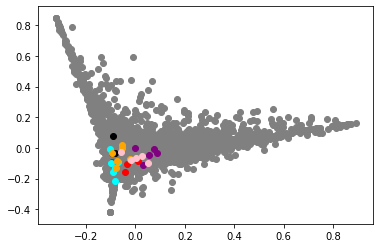

In [292]:
#plot data
plt.scatter(vector_2D[:,0], vector_2D[:,1], c="grey")

# colours group - weapons
data_sample = np.zeros((4, 2))
data_sample[0] = vector_2D[dictionary.index("knife")]
data_sample[1] = vector_2D[dictionary.index("bow")]
data_sample[2] = vector_2D[dictionary.index("sword")]
data_sample[3] = vector_2D[dictionary.index("weapon")]
plt.scatter(data_sample[:,0], data_sample[:,1], c="red")

# numbers group - green
data_sample = np.zeros((5, 2))
data_sample[0] = vector_2D[dictionary.index("five")]
data_sample[1] = vector_2D[dictionary.index("two")]
data_sample[2] = vector_2D[dictionary.index("three")]
data_sample[3] = vector_2D[dictionary.index("four")]
data_sample[3] = vector_2D[dictionary.index("six")]
plt.scatter(data_sample[:,0], data_sample[:,1], c="purple")

# action group - black
data_sample = np.zeros((3, 2))
data_sample[0] = vector_2D[dictionary.index("walk")]
data_sample[1] = vector_2D[dictionary.index("run")]
data_sample[2] = vector_2D[dictionary.index("move")]
plt.scatter(data_sample[:,0], data_sample[:,1], c="black")

# food group - cyan
data_sample = np.zeros((6, 2))
data_sample[0] = vector_2D[dictionary.index("food")]
data_sample[1] = vector_2D[dictionary.index("bread")]
data_sample[2] = vector_2D[dictionary.index("cheese")]
data_sample[3] = vector_2D[dictionary.index("meat")]
data_sample[4] = vector_2D[dictionary.index("water")]
data_sample[5] = vector_2D[dictionary.index("wine")]
plt.scatter(data_sample[:,0], data_sample[:,1], c="cyan")

# animals group - orange
data_sample = np.zeros((6, 2))
data_sample[0] = vector_2D[dictionary.index("bird")]
data_sample[1] = vector_2D[dictionary.index("cat")]
data_sample[2] = vector_2D[dictionary.index("horse")]
data_sample[3] = vector_2D[dictionary.index("animal")]
data_sample[4] = vector_2D[dictionary.index("dog")]
data_sample[5] = vector_2D[dictionary.index("human")]
plt.scatter(data_sample[:,0], data_sample[:,1], c="orange")

# family group - pink
data_sample = np.zeros((5, 2))
data_sample[0] = vector_2D[dictionary.index("sister")]
data_sample[1] = vector_2D[dictionary.index("brother")]
data_sample[2] = vector_2D[dictionary.index("wife")]
data_sample[3] = vector_2D[dictionary.index("family")]
data_sample[4] = vector_2D[dictionary.index("husband")]
plt.scatter(data_sample[:,0], data_sample[:,1], c="pink")

plt.show()

In [235]:
# compute distance matric
dist_matrix = sklearn.metrics.pairwise.euclidean_distances(words_vector)

In [269]:
xxx = np.argmin(np.where(dist_matrix == 0, 9999, dist_matrix), axis=1)
i = 0;
for x in xxx:
    w1 = dictionary[i]
    w2 = dictionary[x]
    dist = dist_matrix[dictionary.index(w1), dictionary.index(w2)]
    if dist < 10.0:
        print(w1 + " - " + w2 + " - " + str(dist))
    i += 1

hunger - grave - 0.15342395053153557
games - here - 0.17339523837710477
the - wooden - 0.1514384617935823
collins - bingley - 0.12243456302132247
part - sight - 0.06990420419129902
tributes - soldiers - 0.17912199220290415
when - while - 0.08849777405957093
wake - lifted - 0.27352296944647037
up - herself - 0.11167199027001332
other - another - 0.1876616206481783
side - sense - 0.08656387679240816
of - from - 0.0739463493697814
bed - feet - 0.14238048559033392
is - was - 0.066620497168527
cold - food - 0.13574900651450855
my - your - 0.11750539678406062
fingers - hands - 0.12725280643874123
stretch - block - 0.19936641616722384
out - danger - 0.11081138886248248
seeking - merely - 0.18319029607255088
prims - his - 0.45947887278082594
warmth - heat - 0.18924236358783017
but - yet - 0.08145278468025274
finding - find - 0.1348331266856656
only - least - 0.12465621294051205
rough - gallant - 0.26619856874997505
cover - reach - 0.18168581106977305
she - he - 0.052654231611249894
must - migh

listening - listen - 0.06597331568190014
convince - allow - 0.17897905959649113
happened - equal - 0.13720859463761767
forgotten - say - 0.1581033480199114
havent - seldom - 0.2865717324535393
during - from - 0.19230867615398733
killed - seen - 0.18129979632497978
accident - world - 0.24236215869480537
earlier - domain - 0.24989793835051294
anyone - people - 0.1681790905629479
loss - account - 0.09074415158835775
passed - pass - 0.15448963714514274
hit - send - 0.21517033076606787
mind - known - 0.13460192542177843
gone - him - 0.12458498398777557
answer - me - 0.14183463521532538
amount - couple - 0.05761575033345312
month - pack - 0.16106391382824894
expected - choose - 0.14061200609513874
job - reply - 0.1688000079795787
sit - sat - 0.19799768123483907
blankets - comfortable - 0.26841872347344015
fixed - hang - 0.18786914770425123
shed - really - 0.23115599432593997
stir - built - 0.195417173816957
moved - driven - 0.21342469124307667
seemed - began - 0.06767602818670033
terrified -

fourteen - islands - 0.3231950143505281
cleared - feet - 0.21870555393074192
blast - cup - 0.18346789451988366
remembered - say - 0.20820382963082829
birth - kindness - 0.1482407118236262
belt - air - 0.18920974536075963
using - keep - 0.19491665285598148
handed - ordered - 0.24051959584419053
transformed - faded - 0.287167682335213
talked - talk - 0.1152923513803145
knowledge - books - 0.08894683101901231
fat - old - 0.23223986595162713
security - passion - 0.26735448484985186
solitary - human - 0.33839691437028313
trusted - saw - 0.2412277842727276
longing - sufficient - 0.12130979549069548
improvement - light - 0.276044073914717
comparison - deal - 0.17509295635203617
voices - hands - 0.1649777534691021
curiosity - fair - 0.16186253725606645
tender - service - 0.24038367738405264
formed - built - 0.17529971267453792
suspect - suppose - 0.17472272074909204
sooner - cervantes - 0.29096470397222585
openly - straight - 0.28054180384339106
content - united - 0.22946254863155735
length - 

entreaties - chance - 0.19327321321859087
refugees - step - 0.29016444840260724
intelligence - business - 0.15029637967737758
states - men - 0.2951876028859799
welcomed - hated - 0.21292976113217107
misfortune - world - 0.14136607108680865
perilous - nails - 0.23957871187497756
motive - waiting - 0.2718898517143909
breeding - sore - 0.24727309643571663
military - decent - 0.42426406871192845
soldier - errant - 0.22519695339872872
fulvia - wizard - 0.24051599579737815
induced - commanded - 0.22189709809460234
anxiously - confined - 0.14173610215193994
recovery - course - 0.19445218973905992
grief - sorrow - 0.12939640579741332
cheerful - quickly - 0.28048477096515195
refuge - engage - 0.20243429079006178
education - war - 0.22317802113732876
council - daughter - 0.21618728584234084
eternal - golden - 0.567877810008977
host - parts - 0.1350154312168305
deprived - number - 0.1388629304021003
cease - determined - 0.14879913766988612
deceived - secured - 0.234429266114941
innocence - meat -

fernando - curate - 0.15828934021860816
cardenio - curate - 0.14323217065530444
luscinda - sam - 0.17855652899457652
landlady - landlord - 0.28621705883879045
christians - ones - 0.2531643290705221
anselmo - he - 0.16636855566149897
lothario - them - 0.19155607417600837
camilla - sun - 0.17169490985226515
can’t - cannot - 0.228132301857113
leonela - he - 0.2193174030874437
moorish - peasant - 0.5351536358735292
zoraida - collins - 0.23960663152024966
enchanter - tongue - 0.23863476266785383
cide - señora - 0.04876598490941791
sanchica - audience - 0.4106032651140442
quiteria - body - 0.2477179920820203
merlin - worship - 0.3446492806081271
duennas - birds - 0.18076079315924837
majordomo - quixote - 0.2503491817865235
ricote - bread - 0.280812679653932
gregorio - wide - 0.20882971006456905


In [266]:
dist_matrix[dictionary.index("girl"), dictionary.index("boy")]

0.2787784762034552